In [1]:
# __________Initializieren Tensorflow______
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


In [2]:
# _________Download IMDB Daten__________ 
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

# Daten in Vektoren mit einer Länge von 10000
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


[0. 1. 1. ... 0. 0. 0.]


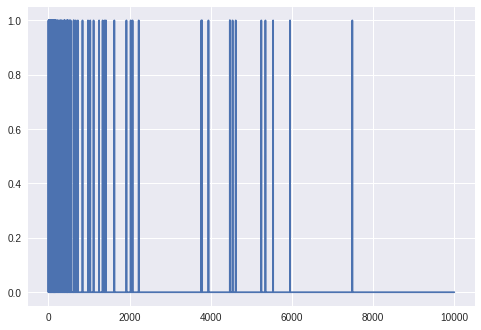

In [3]:
# Wie sehen die Daten aus
len(train_data[0])
print(train_data[0])
plt.plot(train_data[0])

In [4]:
# _______Basis Netz________
# 2 Layer mit 16 Neuronen
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 4s - loss: 0.4837 - acc: 0.8109 - binary_crossentropy: 0.4837 - val_loss: 0.3410 - val_acc: 0.8746 - val_binary_crossentropy: 0.3410
Epoch 2/20
 - 3s - loss: 0.2546 - acc: 0.9102 - binary_crossentropy: 0.2546 - val_loss: 0.2874 - val_acc: 0.8865 - val_binary_crossentropy: 0.2874
Epoch 3/20
 - 3s - loss: 0.1888 - acc: 0.9334 - binary_crossentropy: 0.1888 - val_loss: 0.2883 - val_acc: 0.8848 - val_binary_crossentropy: 0.2883
Epoch 4/20
 - 3s - loss: 0.1536 - acc: 0.9463 - binary_crossentropy: 0.1536 - val_loss: 0.3082 - val_acc: 0.8777 - val_binary_crossentropy: 0.3082
Epoch 5/20
 - 3s - loss: 0.1261 - acc: 0.9574 - binary_crossentropy: 0.1261 - val_loss: 0.3268 - val_acc: 0.8766 - val_binary_crossentropy: 0.3268
Epoch 6/20
 - 3s - loss: 0.1030 - acc: 0.9680 - binary_crossentropy: 0.1030 - val_loss: 0.3566 - val_acc: 0.8722 - val_binary_crossentropy: 0.3566
Epoch 7/20
 - 3s - l

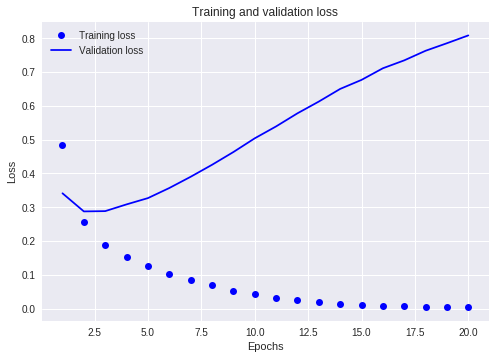

In [8]:
# ______Fehlerfunktion plotten_______

baseline_history_dict = baseline_history.history
baseline_history_dict.keys()

import matplotlib.pyplot as plt

acc = baseline_history_dict['acc']
val_acc = baseline_history_dict['val_acc']
loss = baseline_history_dict['loss']
val_loss = baseline_history_dict['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Accuracy vom Trainingsset zu groß, Differenz zwischen Validationaccuracy hoch --> overfitted


In [0]:
# ___________kleineres Netz___________
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

In [0]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

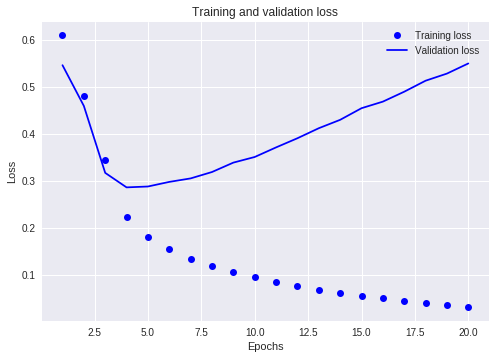

In [11]:
# ______Fehlerfunktion plotten_______

smaller_history_dict = smaller_history.history
smaller_history_dict.keys()

import matplotlib.pyplot as plt

acc = smaller_history_dict['acc']
val_acc = smaller_history_dict['val_acc']
loss = smaller_history_dict['loss']
val_loss = smaller_history_dict['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
# ____großes Netz________
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

In [16]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 9.7506e-06 - acc: 1.0000 - binary_crossentropy: 9.7506e-06 - val_loss: 0.9131 - val_acc: 0.8704 - val_binary_crossentropy: 0.9131
Epoch 2/20
 - 4s - loss: 8.6465e-06 - acc: 1.0000 - binary_crossentropy: 8.6465e-06 - val_loss: 0.9204 - val_acc: 0.8706 - val_binary_crossentropy: 0.9204
Epoch 3/20
 - 4s - loss: 7.7100e-06 - acc: 1.0000 - binary_crossentropy: 7.7100e-06 - val_loss: 0.9276 - val_acc: 0.8704 - val_binary_crossentropy: 0.9276
Epoch 4/20
 - 4s - loss: 6.9034e-06 - acc: 1.0000 - binary_crossentropy: 6.9034e-06 - val_loss: 0.9341 - val_acc: 0.8705 - val_binary_crossentropy: 0.9341
Epoch 5/20
 - 4s - loss: 6.2112e-06 - acc: 1.0000 - binary_crossentropy: 6.2112e-06 - val_loss: 0.9406 - val_acc: 0.8705 - val_binary_crossentropy: 0.9406
Epoch 6/20
 - 4s - loss: 5.6064e-06 - acc: 1.0000 - binary_crossentropy: 5.6064e-06 - val_loss: 0.9469 - val_acc: 0.8705 - val_binary_crossentropy: 0.9469
Epoch 7/20
 - 4s - l

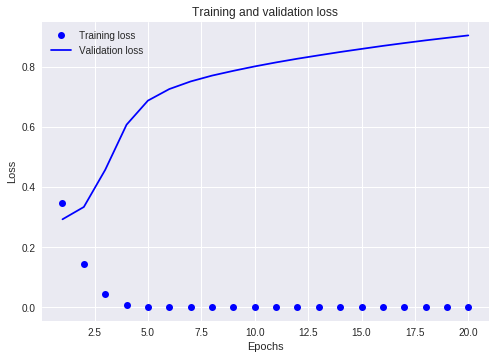

In [14]:
# ______Fehlerfunktion plotten_______

bigger_history_dict = bigger_history.history
bigger_history_dict.keys()

import matplotlib.pyplot as plt

acc = bigger_history_dict['acc']
val_acc = bigger_history_dict['val_acc']
loss = bigger_history_dict['loss']
val_loss = bigger_history_dict['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

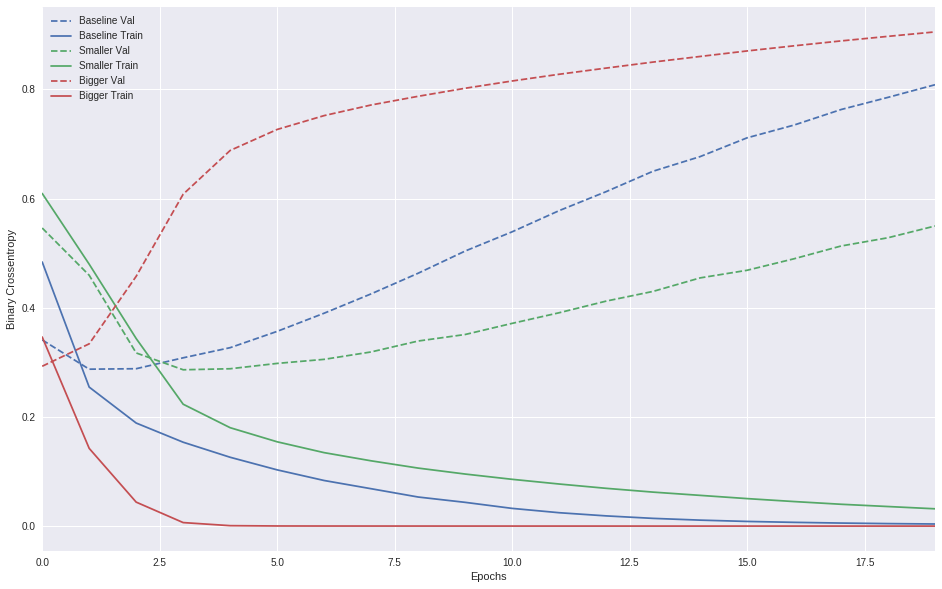

In [15]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [0]:
# _____ Mechanismen gegen Overfitting___
# Gewichte anpassen

l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

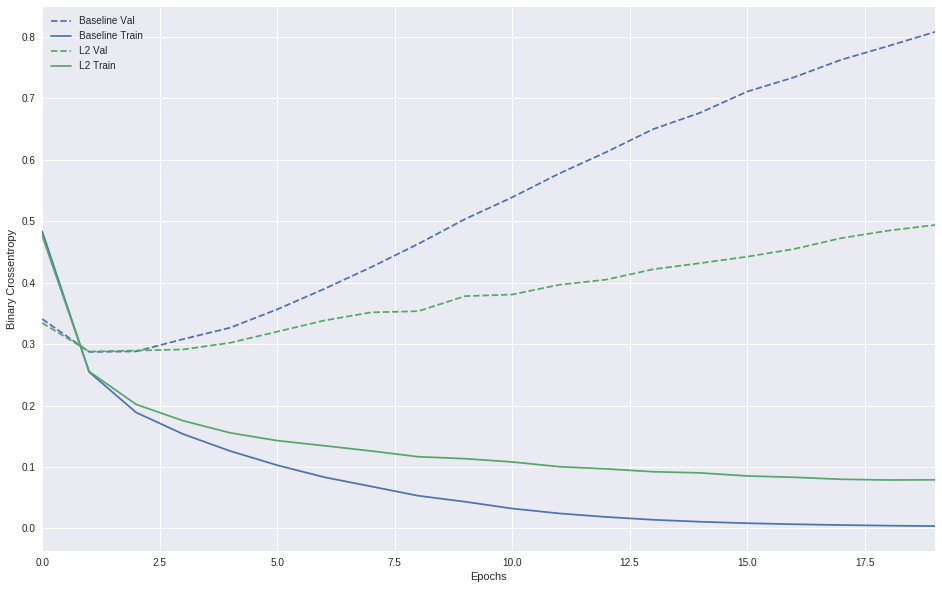

In [18]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [0]:
# _____ Mechanismen gegen Overfitting___
# Dropout: zufällige Neuronen werden deaktiviert
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

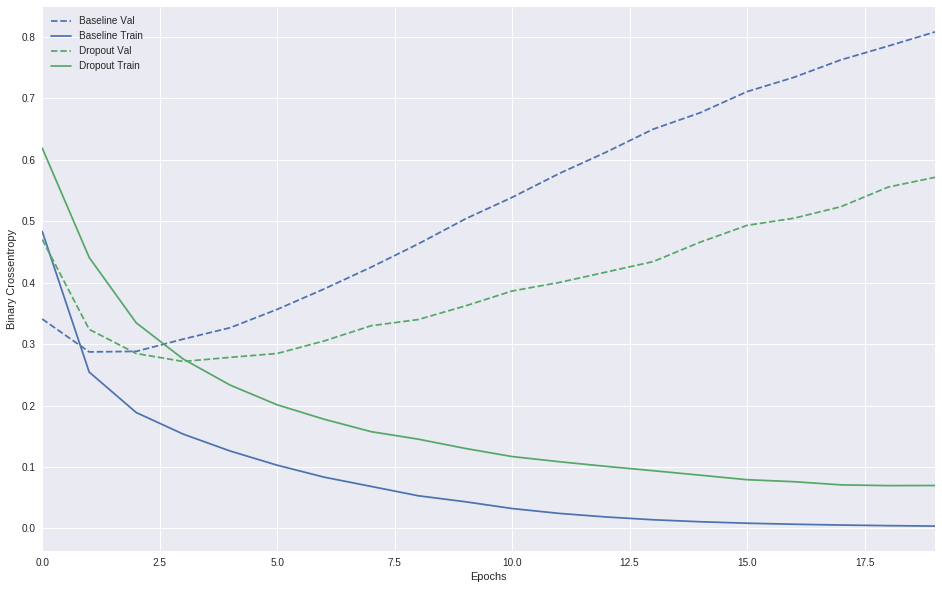

In [20]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])